In [65]:
import os
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

In [66]:
!ls -lrt

total 13400
-rw-r--r--@ 1 adityaranganathan  staff      357 Aug 26 22:25 params.in
-rw-r--r--@ 1 adityaranganathan  staff  1140000 Aug 26 22:25 old_traj.in
-rw-r--r--@ 1 adityaranganathan  staff  3786912 Aug 26 22:25 data.out
-rw-r--r--@ 1 adityaranganathan  staff   356738 Aug 26 22:25 output_movie.mp4
-rw-r--r--@ 1 adityaranganathan  staff     1258 Aug 26 22:25 fig_analysis_1.png
-rw-r--r--@ 1 adityaranganathan  staff   127498 Aug 26 22:25 init_test.png
-rw-r--r--@ 1 adityaranganathan  staff   142256 Aug 26 22:25 temp_plot.png
-rw-r--r--@ 1 adityaranganathan  staff   105372 Aug 26 22:25 test.png
-rw-r--r--@ 1 adityaranganathan  staff     1348 Aug 26 22:25 analysis.py
-rw-r--r--@ 1 adityaranganathan  staff     2574 Aug 26 22:25 aux_funcs.py
-rw-r--r--@ 1 adityaranganathan  staff     6950 Aug 26 22:25 aux_funcs_viz.py
-rw-r--r--@ 1 adityaranganathan  staff     5721 Aug 26 22:25 herd_ODE_class.py
-rw-r--r--@ 1 adityaranganathan  staff     1503 Aug 26 22:25 simulate_ode.py
-rw-r--r--@ 1 a

0
1
2
selector is 3!!


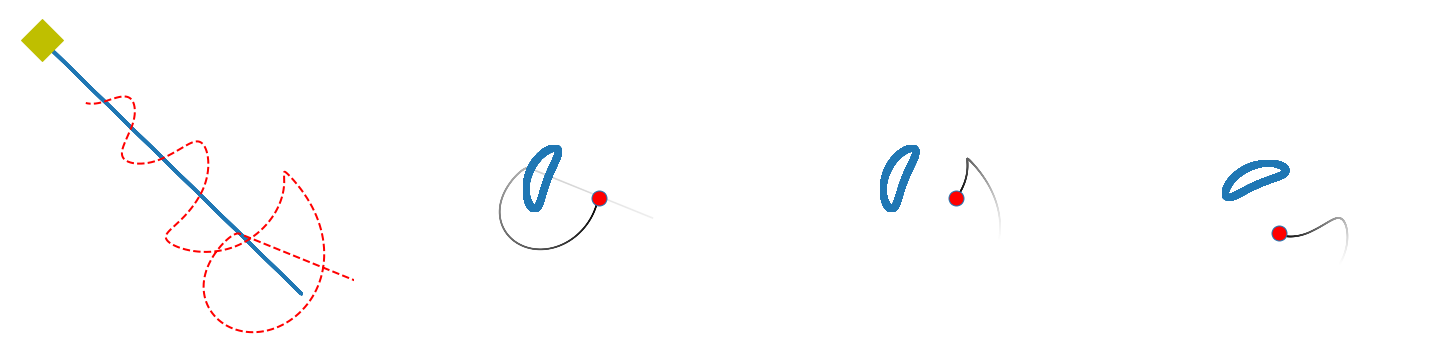

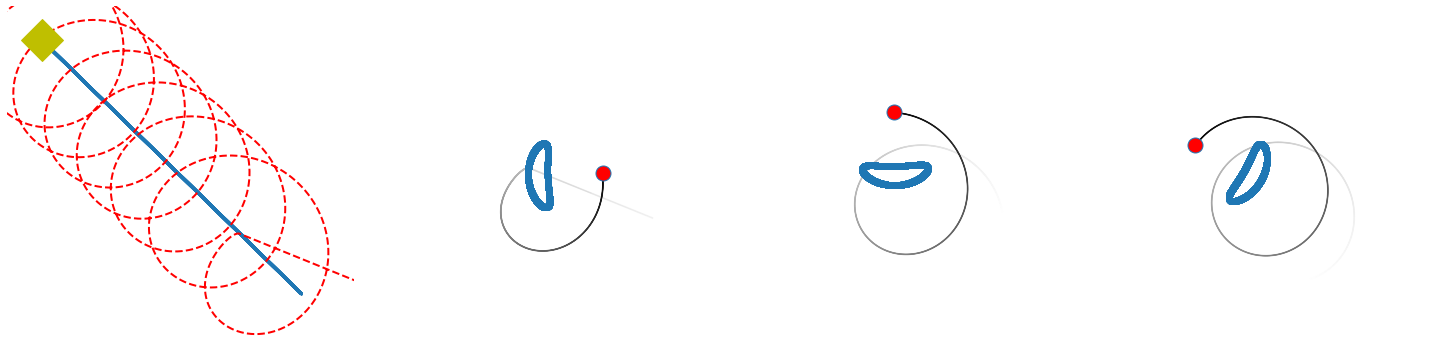

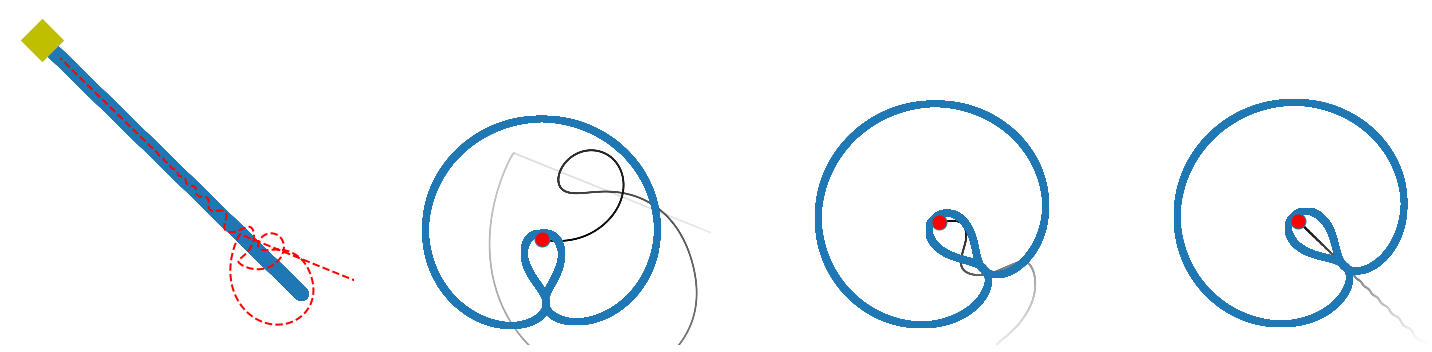

In [213]:
parent_folder = '/Users/adityaranganathan/Dropbox/Harvard_Research/repos/herding_parent/herding_new/ODE/SI_videos_ODE/'
sub_folders = ['droving_1_2022_08_26_22_15', 'mustering_2022_08_26_22_14', 'driving_2022_08_26_22_25']
#sub_folders = ['driving_2022_08_26_22_25']

for selector in range(len(sub_folders)):
    
    change_dir_to = parent_folder + sub_folders[selector]
    os.chdir(change_dir_to)
    #grab necessary info
    from aux_funcs import *
    from aux_funcs_viz import *
    print(selector)

    
    #load the parameter file
    timesteps, dt, lR, lT, lA, lQ, f0, ls, gamma, omega, zeta, alpha, beta, delta, A0, Q0, ThetaGoal, modder, H, uR_mag, uT_mag, sample_number = load_params_auto()
    
    #load the data
    trajectory_data = np.loadtxt("traj.in") #prescribed, auto-generated trajectory
    filename = "data.out"
    data = np.loadtxt(filename)
    
    temp_H = data[:, 1:7]

    
    thetas = temp_H[:,1]+trajectory_data[2,:] + np.pi    
    x_dogs = temp_H[:,0]*-1.0*np.cos(thetas)+trajectory_data[0,:]
    y_dogs = temp_H[:,0]*-1.0*np.sin(thetas)+trajectory_data[1,:]
    
    
    tmp_name = "trajsnapshots_" + sub_folders[selector]+".png"
    make_row_ode(tmp_name)
    

    
    
    # H = [R, T, R', T', Q, A]

In [212]:
def make_row_ode(name):
    
    row = 1
    scale = 12
    history_time = np.int(timesteps/5)
    #scale = np.max(temp_H[history_time:,5])*2
    target_marker_size = 30
    

    fig = plt.figure(figsize = (20,5))
    ax1 = fig.add_subplot(row*100+41)
    ax2 = fig.add_subplot(row*100+42)
    ax3 = fig.add_subplot(row*100+43)
    ax4 = fig.add_subplot(row*100+44)
    
    ax1.axis("off")
    ax2.axis("off")
    ax3.axis("off")
    ax4.axis("off")
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
    if selector == 2:
        print("selector is 3!!")
        scale_factor = 15/45
        ax1.plot(x_dogs*scale_factor, y_dogs*scale_factor, 'r--', linewidth = 2)
        ax1.scatter(trajectory_data[0,:]*scale_factor, trajectory_data[1,:]*scale_factor, s=temp_H[:,5], label = "flock CM position")
        ax1.plot(-15, 15, 'yD', markersize = target_marker_size)
        ax1.set_xlim(-17, 3)
        ax1.set_ylim(-3, 17)
    else:
        ax1.plot(x_dogs, y_dogs, 'r--', linewidth = 2)
        ax1.scatter(trajectory_data[0,:], trajectory_data[1,:], s=temp_H[:,5], label = "flock CM position")
        ax1.plot(-15, 15, 'yD', markersize = target_marker_size)
        ax1.set_xlim(-17, 3)
        ax1.set_ylim(-3, 17)
    
    
    t = np.int(history_time)
    xp_herd, yp_herd = plot_herd_snapshot_only(t)
    x_dog_temp = x_dogs[t-history_time:t]
    y_dog_temp = y_dogs[t-history_time:t]
    xd, yd, zd = colored_line(x_dog_temp, y_dog_temp, 1, linewidth = .05)
    ax2.plot(x_dogs[t], y_dogs[t], "o", mfc='red', linewidth = 8, markersize = 15)
    ax2.pcolormesh(xd, yd, zd, shading='gouraud', cmap='Greys', label = 'Dogs', alpha = 0.5)
    ax2.scatter(xp_herd, yp_herd)
    ax2.set_xlim(trajectory_data[0,t]-scale, trajectory_data[0,t]+scale)
    ax2.set_ylim(trajectory_data[1,t]-scale, trajectory_data[1,t]+scale)
    
    t = np.int(2*history_time)
    xp_herd, yp_herd = plot_herd_snapshot_only(t)
    x_dog_temp = x_dogs[t-history_time:t]
    y_dog_temp = y_dogs[t-history_time:t]
    xd, yd, zd = colored_line(x_dog_temp, y_dog_temp, 1, linewidth = .05)
    ax3.plot(x_dogs[t], y_dogs[t], "o", mfc='red', linewidth = 8, markersize = 15)
    ax3.pcolormesh(xd, yd, zd, shading='gouraud', cmap='Greys', label = 'Dogs', alpha = 0.5)
    ax3.scatter(xp_herd, yp_herd)
    ax3.set_xlim(trajectory_data[0,t]-scale, trajectory_data[0,t]+scale)
    ax3.set_ylim(trajectory_data[1,t]-scale, trajectory_data[1,t]+scale)
    
    t = np.int(4*history_time)
    xp_herd, yp_herd = plot_herd_snapshot_only(t)
    x_dog_temp = x_dogs[t-history_time:t]
    y_dog_temp = y_dogs[t-history_time:t]
    xd, yd, zd = colored_line(x_dog_temp, y_dog_temp, 1, linewidth = .05)
    ax4.plot(x_dogs[t], y_dogs[t], "o", mfc='red', linewidth = 8, markersize = 15)
    ax4.pcolormesh(xd, yd, zd, shading='gouraud', cmap='Greys', label = 'Dogs', alpha = 0.5)
    ax4.scatter(xp_herd, yp_herd)
    ax4.set_xlim(trajectory_data[0,t]-scale, trajectory_data[0,t]+scale)
    ax4.set_ylim(trajectory_data[1,t]-scale, trajectory_data[1,t]+scale)
    
    
    
    fig.tight_layout()
    
    plt.savefig(name)

In [94]:
def plot_herd_snapshot_only(curr_time):
    H_snapshot = temp_H[curr_time,:]
    
    R = H_snapshot[0]
    T = H_snapshot[1]
    Q = H_snapshot[4]
    A = H_snapshot[5]
    
    b = np.sqrt(A/(np.pi*Q))
    a_angle = Q*b/R
    
    phi_array = np.arange(-a_angle, a_angle, 0.001)
    r_array_1 = np.zeros(len(phi_array))
    r_array_2 = np.zeros(len(phi_array))
    for kk in range(len(phi_array)):
        r_array_1[kk] = R+b*np.sqrt(1-(phi_array[kk])**2/a_angle**2)
        r_array_2[kk] = R-b*np.sqrt(1-(phi_array[kk])**2/a_angle**2)
    phi_array_sum = np.concatenate((phi_array, phi_array))
    r_array_sum = np.concatenate((r_array_1, r_array_2))
    
    x = np.array([np.cos(phi_array_sum[kk])*r_array_sum[kk] for kk in range(len(r_array_sum))])
    y = np.array([np.sin(phi_array_sum[kk])*r_array_sum[kk] for kk in range(len(r_array_sum))])

    x_centered = x - R
    y_centered = y

    theta_rot = thetas[curr_time]
    x_rot = np.array([np.cos(theta_rot)*x_centered[ii]-np.sin(theta_rot)*y_centered[ii] for ii in range(len(x))])
    y_rot = np.array([np.sin(theta_rot)*x_centered[ii]+np.cos(theta_rot)*y_centered[ii] for ii in range(len(x))])
    
    
    x_shift = trajectory_data[0, curr_time]
    y_shift = trajectory_data[1, curr_time]
    
    return [(x_rot+x_shift), (y_rot+y_shift)]
    
    #ax2.plot(x_rot+x_shift, y_rot+y_shift, '.', label = 'herd (x,y), with rotation')
    

In [83]:
#step 1: be able to plot the x-y trajectories of the droving data -- WOOT
#step 2: be able to cycle through and plot the x-y trajectories of each phase -- DONE!
#setp 3: be able to plot a snapshot at any given time

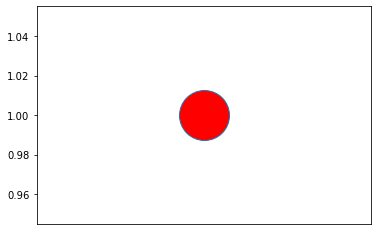

In [217]:
plt.plot(1, 1, "o", mfc='red', linewidth = 8, markersize = 50)
plt.show()